In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/SistemasInteligentes"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install nltk

In [3]:
#Las librerias a usar 
import numpy as np
import pandas as pd
from time import time, sleep
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
# La libreria que se va a usar de Natural Languaje ToolKit
import nltk

nltk.download('punkt')

nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
def leerArchivo(filein):
  data = pd.read_csv(filein) 
  return data

train_data = leerArchivo(path + '/TrainingDS.csv')

print(train_data.shape)
print(train_data.info())
print()
print(train_data['Text'])
print(train_data['Text'][0])
print()
print(train_data)


###Lee un archivo de la carpeta de drive

(1500, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1500 non-null   int64 
 1   Text    1500 non-null   object
 2   Class   1500 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 35.3+ KB
None

0       Trump supporters needed to say the 4 Democrats...
1       Send them back!!Why the hell are they even her...
2       Yeah...Im wondering if send them back works fo...
3       I know you realize you cant pretend that you d...
4       Donny, you owe all people an apology for appla...
                              ...                        
1495    If a white person Migrated here and obvisouly ...
1496    Talk about 1 Hes a dumbass who never texts bac...
1497    Send them Back and Love it or leave it are two...
1498    If Trump wants to end racist chants all he nee...
1499    maybe they meant send her back to her home sta...
Name: Tex

In [ ]:
def tokenize(text) : 
  return word_tokenize(text)

# saca las palabras de un texto y las guarda como una lista 

In [ ]:
word = tokenize(train_data['Text'][0])

print(word)

['Trump', 'supporters', 'needed', 'to', 'say', 'the', '4', 'Democrats', 'socialist', 'Squad', 'are', 'racist', 'towards', 'Trump', 'America', 'supporter', '.', 'America', 'has', 'freedom', 'of', 'speech', 'and', 'it', 'was', 'a', 'Trump', 'hyper', 'rally', 'not', 'a', 'Socialist', 'Democratic', 'squad', 'rally', '.', 'The', 'rally', 'said', 'send', 'her', 'back', 'the', 'one', 'not', 'migrants', 'Socialist', 'Democratic']


In [ ]:
def stop_Words(words_text) : 
  stop_words = set(stopwords.words("english"))
  filtered_list = []
  for word in words_text:
    if word.casefold() not in stop_words:
         filtered_list.append(word)
  return filtered_list

  # hace el filtrado de palabras, para que solo tengas las necesarias, sin puntos y sin estabiques 

In [ ]:
words_stop = stop_Words(word)

print(words_stop)

['Trump', 'supporters', 'needed', 'say', '4', 'Democrats', 'socialist', 'Squad', 'racist', 'towards', 'Trump', 'America', 'supporter', '.', 'America', 'freedom', 'speech', 'Trump', 'hyper', 'rally', 'Socialist', 'Democratic', 'squad', 'rally', '.', 'rally', 'said', 'send', 'back', 'one', 'migrants', 'Socialist', 'Democratic']


In [ ]:
def tag(words_stop) : 
  return nltk.pos_tag(words_stop)

  # hace el tag de las palabras, dice que palabra es verbo, ... es especial el adjetivo 

In [ ]:
tagging = tag(words_stop)
print(tagging)

[('Trump', 'NNP'), ('supporters', 'NNS'), ('needed', 'VBD'), ('say', 'VBP'), ('4', 'CD'), ('Democrats', 'NNPS'), ('socialist', 'VBP'), ('Squad', 'NNP'), ('racist', 'NN'), ('towards', 'NNS'), ('Trump', 'NNP'), ('America', 'NNP'), ('supporter', 'NN'), ('.', '.'), ('America', 'NNP'), ('freedom', 'NN'), ('speech', 'NN'), ('Trump', 'NNP'), ('hyper', 'VBZ'), ('rally', 'RB'), ('Socialist', 'NNP'), ('Democratic', 'NNP'), ('squad', 'VBD'), ('rally', 'RB'), ('.', '.'), ('rally', 'NN'), ('said', 'VBD'), ('send', 'VBP'), ('back', 'RB'), ('one', 'CD'), ('migrants', 'NNS'), ('Socialist', 'NNP'), ('Democratic', 'JJ')]


In [ ]:
from collections import Counter

In [ ]:
def getAdjectives(tagging):
  counts = Counter(x[1] for x in tagging)
  return counts['RB']

  # hace el conteo de los adjetivos en la lista, regresa un numero 

In [ ]:
number = getAdjectives(tagging)
print(number)

3


In [ ]:
def getListAdjectives(text):
  token1 = tokenize(text)
  words_stop = stop_Words(token1)
  tagging = tag(words_stop)
  number = getAdjectives(tagging)
  return number

# junta todoas las funciones descritas arriva para juntarlas en una sola funcion 

In [ ]:


number1 = getListAdjectives(train_data['Text'][0])

print(number1)

3


In [ ]:
number  = [getListAdjectives(x) for x in train_data['Text']]

print(number)
# Hace el list comprehension con la funcion definida arriba, para toda la columna de Text, 

[3, 3, 2, 2, 1, 0, 1, 1, 1, 1, 5, 1, 2, 1, 2, 2, 5, 0, 0, 5, 3, 1, 1, 0, 4, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 1, 2, 2, 1, 0, 4, 2, 4, 0, 7, 0, 2, 2, 1, 1, 2, 0, 1, 0, 3, 0, 2, 4, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 2, 1, 1, 2, 0, 3, 1, 1, 0, 4, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 5, 0, 0, 0, 0, 2, 5, 4, 2, 0, 2, 0, 1, 1, 3, 1, 0, 3, 2, 0, 0, 1, 2, 1, 2, 1, 3, 2, 3, 0, 2, 0, 5, 2, 1, 2, 0, 1, 3, 0, 1, 3, 6, 1, 1, 0, 2, 0, 3, 1, 1, 1, 2, 1, 4, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 3, 0, 3, 5, 5, 1, 1, 0, 3, 4, 2, 1, 1, 2, 2, 1, 0, 0, 2, 3, 3, 1, 0, 1, 1, 0, 2, 1, 2, 4, 0, 2, 1, 3, 2, 0, 1, 1, 3, 3, 1, 2, 2, 1, 2, 1, 1, 3, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 2, 2, 0, 5, 3, 0, 1, 2, 2, 0, 1, 0, 1, 4, 0, 1, 1, 1, 1, 1, 1, 2, 0, 8, 5, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 4, 1, 0, 1, 4, 1, 0, 1, 3, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 

In [ ]:
adjectives1 = pd.DataFrame (number,columns=['num_pronouns'])

print(adjectives1)
# convierte la lista en una DataFrame de Pandas 

      num_pronouns
0                3
1                3
2                2
3                2
4                1
...            ...
1495             3
1496             3
1497             0
1498             2
1499             2

[1500 rows x 1 columns]


In [ ]:
#La primera vez que lo haces, corres este , ya que el archivo no existe
adjectives1.to_csv( path + '/num_pronouns.csv' , index=False)

In [ ]:
test_data = leerArchivo(path + '/TestingDS.csv')
print(test_data)
number1  = [getListAdjectives(x) for x in test_data['Text']]

print(number1)
adjectives2 = pd.DataFrame (number1,columns=['num_pronouns'])
print(adjectives2)
adjectives2.to_csv( path + '/num_pronounsTesting.csv' , index=False)

#Hace todo lo de arriva pero para el csv de testing, no de training 

      ID                                               Text Class
0      1  Ye bhi illegal immigrant lag rahi hai -- NRC r...     ?
1      2  Yeah I asked someone about her skirt today and...     ?
2      3  You need to clean your SELECTIVE HEARING COBWE...     ?
3      4  It easy to complain and criticize with no offe...     ?
4      5  Guess the send-them-back policy of your friend...     ?
..   ...                                                ...   ...
495  496  By the way Chucky. When Obama was in there you...     ?
496  497  Exactly. Obama used strong language about bord...     ?
497  498  If corporations can be sued and punished for t...     ?
498  499  Lara Trump accuses critics of Send her back of...     ?
499  500  Trump reverses again, says crowd chanting 'sen...     ?

[500 rows x 3 columns]
[1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 4, 2, 4, 1, 2, 0, 2, 4, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 3, 2, 3, 0, 2, 3, 0, 2, 1, 0, 3, 1, 1, 1, 1, 0, 1, 1, 4, 1, 0, 3, 2, 2, 3, 

In [5]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

train_data = leerArchivo(path + '/TrainingFeatures12.csv')

test_data = leerArchivo(path + '/TestingFeatures12.csv')


print(train_data.shape)
print(train_data)



print(test_data.shape)
print(test_data)

0.22.2.post1
(1500, 14)
        ID     Angry     Bored  ...  positive  num_pronouns  Class
0        1  0.330354  0.191216  ...     0.021             3      0
1        2  0.770339  0.000000  ...     0.008             3      1
2        3  0.082902  0.040598  ...     0.181             2      1
3        4  0.212125  0.099159  ...     0.024             2      1
4        5  0.256015  0.039799  ...     0.139             1      0
...    ...       ...       ...  ...       ...           ...    ...
1495  1496  0.364380  0.194433  ...     0.039             3      1
1496  1497  0.383623  0.243487  ...     0.009             3      0
1497  1498  0.119372  0.069586  ...     0.255             0      1
1498  1499  0.491174  0.156592  ...     0.018             2      0
1499  1500  0.193134  0.088926  ...     0.124             2      1

[1500 rows x 14 columns]
(500, 14)
      ID     Angry     Bored  ...  positive  num_pronouns  Class
0      1  0.303354  0.028878  ...     0.354             1      ?
1     

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline 

In [7]:
train_data.head()

,ID,Angry,Bored,Excited,Fear,Happy,Sad,hate_speech,negative,neutral,num_adjectives,positive,num_pronouns,Class
0,1,0.330354,0.191216,0.073397,0.160128,0.047168,0.197736,0.946569,0.830,0.149,1,0.021,3,0
1,2,0.770339,0.000000,0.041846,0.049029,0.041486,0.097300,0.000063,0.943,0.049,3,0.008,3,1
2,3,0.082902,0.040598,0.126018,0.382833,0.145362,0.222287,0.207301,0.180,0.639,0,0.181,2,1
3,4,0.212125,0.099159,0.141654,0.123326,0.149458,0.274277,0.489484,0.822,0.154,3,0.024,2,1
4,5,0.256015,0.039799,0.108494,0.064073,0.452872,0.078746,0.002262,0.608,0.253,3,0.139,1,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1500 non-null   int64  
 1   Angry           1500 non-null   float64
 2   Bored           1500 non-null   float64
 3   Excited         1500 non-null   float64
 4   Fear            1500 non-null   float64
 5   Happy           1500 non-null   float64
 6   Sad             1500 non-null   float64
 7   hate_speech     1500 non-null   float64
 8   negative        1500 non-null   float64
 9   neutral         1500 non-null   float64
 10  num_adjectives  1500 non-null   int64  
 11  positive        1500 non-null   float64
 12  num_pronouns    1500 non-null   int64  
 13  Class           1500 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 164.2 KB


In [9]:
train_data['Class'].value_counts()

0    920
1    580
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


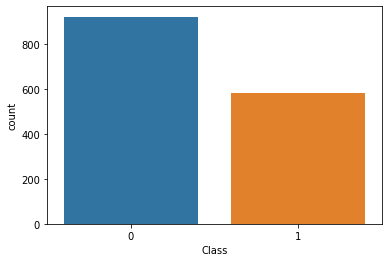

In [10]:
sns.countplot(train_data['Class'])

In [11]:
X = train_data.drop('Class', axis = 1)
y = train_data['Class']

X_testDs = test_data.drop('Class', axis = 1)
y_testDs = test_data['Class']


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1200, 13)
(1200,)
(300, 13)
(300,)


In [13]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
train_data.head(10)

,ID,Angry,Bored,Excited,Fear,Happy,Sad,hate_speech,negative,neutral,num_adjectives,positive,num_pronouns,Class
0,1,0.330354,0.191216,0.073397,0.160128,0.047168,0.197736,0.946569,0.830,0.149,1,0.021,3,0
1,2,0.770339,0.000000,0.041846,0.049029,0.041486,0.097300,0.000063,0.943,0.049,3,0.008,3,1
2,3,0.082902,0.040598,0.126018,0.382833,0.145362,0.222287,0.207301,0.180,0.639,0,0.181,2,1
3,4,0.212125,0.099159,0.141654,0.123326,0.149458,0.274277,0.489484,0.822,0.154,3,0.024,2,1
4,5,0.256015,0.039799,0.108494,0.064073,0.452872,0.078746,0.002262,0.608,0.253,3,0.139,1,0
5,6,0.211193,0.313262,0.100942,0.173187,0.040114,0.161302,0.000031,0.676,0.262,0,0.063,0,0
6,7,0.152233,0.420269,0.138129,0.099576,0.115025,0.074768,0.000431,0.416,0.312,3,0.273,1,1
7,8,0.642167,0.047800,0.060938,0.082964,0.027940,0.138191,0.998784,0.977,0.018,0,0.005,1,0
8,9,0.308391,0.107203,0.109692,0.177769,0.080976,0.215969,0.996524,0.493,0.408,1,0.099,1,1
9,10,0.248285,0.242345,0.075390,0.212518,0.043387,0.178076,0.014597,0.743,0.229,0,0.028,1,0


In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.score(X_test, y_test)

0.5966666666666667

In [ ]:
dt.score(X_train, y_train)

1.0

In [16]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [17]:
bg.score(X_test, y_test)

0.6066666666666667

In [18]:
bg_predict = bg.predict(X_test)
predict = bg.predict(X_testDs)

In [19]:
print(classification_report(y_test, bg_predict))

              precision    recall  f1-score   support

           0       0.61      0.86      0.71       171
           1       0.59      0.27      0.37       129

    accuracy                           0.61       300
   macro avg       0.60      0.57      0.54       300
weighted avg       0.60      0.61      0.57       300



In [20]:
print(confusion_matrix(y_test, bg_predict))

[[147  24]
 [ 94  35]]


In [21]:
print(predict.shape)


id = X_testDs['ID']

df = pd.DataFrame({'ID':id, 'Class':predict}, columns=['ID','Class'])

(500,)


In [47]:
df.to_csv( path + '/sub_baggin.csv' , index=False)

In [26]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 5)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [27]:
adb.score(X_test, y_test)

0.58

In [28]:
adb_predict = bg.predict(X_test)
predict2 = bg.predict(X_testDs)

In [29]:
print(classification_report(y_test, adb_predict))

              precision    recall  f1-score   support

           0       0.61      0.86      0.71       171
           1       0.59      0.27      0.37       129

    accuracy                           0.61       300
   macro avg       0.60      0.57      0.54       300
weighted avg       0.60      0.61      0.57       300



In [30]:
print(confusion_matrix(y_test, adb_predict))

[[147  24]
 [ 94  35]]


In [31]:
print(predict2.shape)


id = X_testDs['ID']

ada_df = pd.DataFrame({'ID':id, 'Class':predict2}, columns=['ID','Class'])

(500,)


In [32]:
ada_df.to_csv( path + '/sub_adb.csv' , index=False)